### Bag of Words

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

In [2]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



[2 0 1 1 2 1 1 1 2 2 0 0 0 1 0 1 1 2 1 2 0 2 1 1 1 2 1 2 1 2 1 1 0 2 0 1 1
 2 0 0 2 2 1 0 0 1 2 1 0 2 1 1 2 0 0 1 1 2 2 0 0 1 2 0 2 2 0 1 0 0 0 1 2 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 0 0 2 1 1 1 2 1 0 1 1 1 1 2 0 1 0 2 1
 2 2 2 1 1 1 2 0 2 0 0 1 2 0 0 1 0 0 2 1 1 1 1 0 1 1 1 1 0 2 1 2 2 2 2 2 2
 2 2 2 2 1 1 2 1 1 2 1 2 1 0 0 0 2 1 1 0 2 2 2 1 0 2 2 1 2 1 0 2 2 0 1 2 2
 1 2 2 1 2 2 0 2 0 0 0 1 1 0 0 1 2 1 2 0 2 0 2 1 0 1 2 2 2 2 0 1 0 2 2 2 1
 0 0 2 0 1 2 0 2 0 1 0 0 1 2 1 1 2 2 0 2 1 0 1 0 1 1 0 0 2 1 0 0 0 2 1 1 2
 1 1 1 1 0 2 2 1 0 2 1 2 0 0 0 1 1 1 0 0 2 1 1 0 0 2 1 2 1 2 0 2 2 2 1 0 1
 0 0 0 0 1 2 1 1 1 0 0 1 2 0 0 1 2 2 2 1 1 2 1 2 2 0 0 0 0 0 0 2 2 1 2 1 0
 1 2 0 2 0 2 2 0 2 1 2 0 1 1 1 0 1 1 2 0 1 2 1 2 0 2 1 2 2 0 0 0 0 1 0 1 0
 2 1 2 2 2 1 1 1 1 2 1 0 0 0 0 2 1 1 2 1 1 2 0 0 1 0 0 0 1 2 0 0 1 2 2 1 1
 0 1 0 0 0 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 0 1 2 1 1 0 0 1 1 0 0 2 0 0 2 0
 2 1 2 1 1 1 1 2 0 1 2 1 2 2 2 2 2 2 0 2 2 2 0 2 2 1 1 2 0 1 0 1 2 1 0 1 0
 2 0 0 1 1 2 2 1 2 1 1 1 

<Figure size 640x480 with 2 Axes>

### Bag.py

In [3]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      

        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
        
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """

        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        label_count = 0 
        for word, imlist in self.images.items():
            self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, label_count)
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #featureV = self.im_helper.featuresPL(im)
                
                self.descriptor_list.append(des)

            label_count += 1


        # perform clustering
        
        #print(self.descriptor_list)
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.bov_helper.train(self.train_labels)
        print("trainModel DONE.")


    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.


        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb



    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)

        predictions = []

        for word, imlist in self.testImages.items():
            print("processing " ,word)
            for im in imlist:
                # print imlist[0].shape, imlist[1].shape
                print(im.shape)
                cl = self.recognize(im)
                print(cl)
                predictions.append({
                    'image':im,
                    'class':cl,
                    'object_name':self.name_dict[str(int(cl[0]))]
                    })

        print(predictions)
        for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #if (self.gray):
            #    plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #else: 
            #    plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_BGR2RGB))
            plt.imshow(Image.fromarray(each['image']))
            plt.title(each['object_name'])
            plt.show()


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = [0 if name.startswith('neg') else 1 for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = [0 if name.startswith('neg') else 1 for name in self.test_img_names]
        self.testImageCount = len(self.test_images)
        
        # set testing paths
        #self.test_path = test_path
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()    

# if __name__ == '__main__':

#     # parse cmd args
#     parser = argparse.ArgumentParser(
#             description=" Bag of visual words example"
#         )
#     parser.add_argument('--train_path', action="store", dest="train_path", required=True)
#     parser.add_argument('--test_path', action="store", dest="test_path", required=True)

#     args =  vars(parser.parse_args())
#     print(args)

    
#     bov = BOV(no_clusters=100)

#     # set training paths
#     bov.train_path = args['train_path'] 
#     # set testing paths
#     bov.test_path = args['test_path'] 
#     # train the model
#     bov.trainModel()
#     # test model
#     bov.testModel()


### helper.py

In [4]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.clf  = SVC()    

    def cluster(self):
        """    
        cluster using KMeans algorithm, 

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        print("n_images:",n_images)
        print("descriptor_list length:", len(descriptor_list))
        
        for i in range(n_images):
            #print(i)
            l = len(descriptor_list[i])
            for j in range(l): 
                #print(i, j)
                if kmeans_ret is None:
                    if (old_count+j==n_images):
                        print(old_count+j)
                        break;
                    else: 
                        idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                #print("why are we still here")
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        print("l: ")
        print(l)
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn.svm.SVC classifier (SVM) 


        """
        print("Training SVM")
        print(self.clf)
        print("Train labels", train_labels)
        self.clf.fit(self.mega_histogram, train_labels)
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        print(car_data_path, folder)
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")

        #images = np.stack(images, axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                #im = cv2.imread(imagefile,1)
                
                #plt.imshow(im)
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

In [5]:
cars = BOV(no_clusters=100)
cars.loadCars("../../ex3/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("../../ex3/FIDS30/")

../../ex3/CarData/ TrainImages
Found 1050 car files
../../ex3/CarData/ TestImages
Found 170 car files


Text(0.5,1,'Colour Histogram, using PIL')

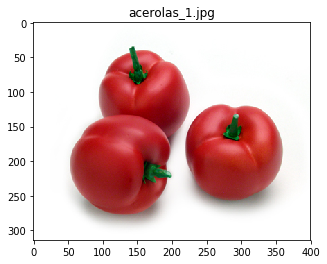

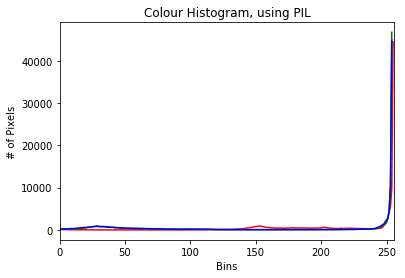

In [6]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

In [7]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

2 unique classes for cars
30 unique classes for fruits


Text(0.5,1,'watermelons')

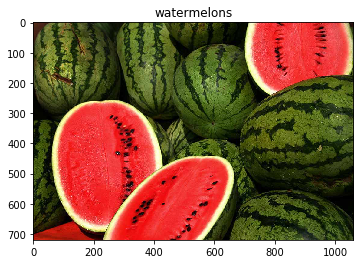

In [8]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

In [9]:
cars.trainModel()

train image count:  1050
Computing Features for  0
List:  [array([[ 71,  65,  69, ...,  57,  54,  33],
       [ 67,  61,  63, ...,  57,  49,  27],
       [ 59,  52,  57, ...,  54,  43,  22],
       ...,
       [219, 221, 218, ..., 159, 162, 163],
       [201, 197, 198, ..., 185, 187, 193],
       [198, 192, 197, ..., 197, 190, 198]], dtype=uint8), array([[ 75,  77,  92, ...,  64,  69,  57],
       [ 53,  68,  78, ...,  66,  91,  79],
       [ 64,  82,  78, ...,  73, 101,  74],
       ...,
       [239, 241, 243, ..., 201, 191, 164],
       [239, 241, 243, ..., 195, 197, 198],
       [241, 241, 243, ..., 197, 191, 206]], dtype=uint8), array([[ 11,   9,  15, ..., 232, 237, 241],
       [ 12,   2,   8, ..., 218, 204, 186],
       [ 10,   3,   6, ..., 241, 237, 232],
       ...,
       [  2,   0,  58, ...,  33,  70,  64],
       [  1,  12,  71, ...,  19,  18,  24],
       [  0,  12,  43, ..., 226,  72, 142]], dtype=uint8), array([[154, 148, 147, ...,  63,  70,  78],
       [148, 149, 165, .

List:  [array([[153, 153, 153, ..., 193, 193, 193],
       [131, 153, 131, ..., 193, 166, 193],
       [131, 131, 153, ..., 206, 193, 193],
       ...,
       [242, 242, 242, ..., 224, 206, 224],
       [242, 242, 242, ..., 224, 224, 206],
       [224, 224, 224, ..., 206, 224, 224]], dtype=uint8), array([[ 87,  93, 112, ..., 173, 193, 155],
       [112, 121, 144, ..., 183, 206, 183],
       [ 64,  72, 112, ..., 183, 219, 183],
       ...,
       [219, 219, 219, ..., 219, 219, 206],
       [206, 206, 206, ..., 219, 219, 219],
       [193, 193, 193, ..., 206, 206, 193]], dtype=uint8), array([[220, 188, 124, ..., 115, 115,  92],
       [220, 171, 132, ..., 108, 108, 108],
       [227, 188, 171, ..., 115, 108,  92],
       ...,
       [253, 243, 243, ..., 188, 196, 196],
       [253, 253, 253, ..., 196, 188, 188],
       [253, 253, 253, ..., 180, 180, 188]], dtype=uint8), array([[ 57,  70,  57, ...,   9,   9,   9],
       [ 57,  57,  70, ...,   9,   9,  14],
       [ 57,  45,  89, ...,   9

n_images: 1050
descriptor_list length: 1050
1050


IndexError: index 1280 is out of bounds for axis 0 with size 1050

### Cars

In [ ]:
#bov = BOV(no_clusters=100)
#bov.start("images\\train\\", "images\\test\\")
#bov.start("../../../ex3/CarData/TrainImages/", "../../../ex3/CarData/TestImages/")
#bov.start("../../../ex3/FIDS30/train/", "../../../ex3/FIDS30/test/")